In [1]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [3]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/testout.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
qbovercnt

,over
bowler,
A Kumble,446
AD Mathews,312
Abdur Rehman,471
B Lee,324
BA Stokes,429
CS Martin,483
D Bishoo,466
DBL Powell,316
DJ Bravo,382


In [4]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/testpair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,B Lee,7,0,2,PM Siddle
1,4,0,3,B Lee,4,0,4,PM Siddle
2,4,0,5,B Lee,1,0,6,PM Siddle
3,5,0,7,B Lee,8,0,8,PM Siddle
4,9,0,9,MG Johnson,4,0,10,PM Siddle
...,...,...,...,...,...,...,...,...
32815,3,0,119,RL Chase,2,0,120,AS Joseph
32816,2,0,121,RL Chase,7,1,122,AS Joseph
32817,5,0,123,RL Chase,4,0,124,AS Joseph
32818,2,0,125,RL Chase,0,0,126,ML Cummins


In [5]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1              bowler2            
A Brindle            JL Gunn                  3
A Dananjaya          CBRLS Kumara             3
                     DM de Silva              2
                     HMRKB Herath             7
                     KAJ Roach                1
                     L Embuldeniya           17
                     MDK Perera               8
                     RAS Lakmal              12
                     VD Philander             1
A Flintoff           AF Giles                 1
                     DL Vettori               4
                     GP Swann                13
                     IR Bell                  2
                     J Lewis                  4
                     JM Anderson              8
                     M Muralitharan           7
                     MJ Hoggard               6
                     MS Panesar               9
                     SCJ Broad               14
                     SJ Harmison             11

In [6]:
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

Bpartners

{'A Kumble': array(['V Sehwag', 'Harbhajan Singh', 'Z Khan', 'IK Pathan', 'I Sharma',
        'RP Singh', 'S Sreesanth', 'MM Patel', 'JM Anderson', 'SC Ganguly',
        'PP Chawla', 'SR Tendulkar', 'VRV Singh'], dtype=object),
 'AD Mathews': array(['KTGD Prasad', 'RAS Lakmal', 'RMS Eranga', 'N Pradeep',
        'PVD Chameera', 'HMRKB Herath', 'UWMBCA Welegedara',
        'M Muralitharan', 'BAW Mendis', 'NLTC Perera', 'T Thushara',
        'KMDN Kulasekara', 'S Randiv', 'MDK Perera', 'TM Dilshan',
        'PHT Kaushal', 'CBRLS Kumara', 'MD Shanaka', 'WPUJC Vaas'],
       dtype=object),
 'Abdur Rehman': array(['Saeed Ajmal', 'Umar Gul', 'Junaid Khan', 'Shoaib Malik',
        'Mohammad Asif', 'Mohammad Hafeez', 'Tanvir Ahmed (1)',
        'Younis Khan', 'Wahab Riaz', 'Danish Kaneria', 'Mohammad Talha',
        'Z Khan', 'Aizaz Cheema', 'Mohammad Sami'], dtype=object),
 'B Lee': array(['PM Siddle', 'MG Johnson', 'SR Watson', 'SR Clark', 'GD McGrath',
        'SCG MacGill', 'SK Warne', 'A 

In [7]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

AD Mathews NLTC Perera 61
AD Mathews KMDN Kulasekara 61
AU Rashid MM Ali 167
AU Rashid LE Plunkett 72
Abdur Razzak Shakib Al Hasan 130
Abdur Razzak Mahmudullah 68
B Kumar JJ Bumrah 121
B Kumar Mohammed Shami 95
B Lee NW Bracken 78
CH Gayle DJ Bravo 64
DJ Bravo DJG Sammy 67
DL Vettori SB Styris 87
DL Vettori JDP Oram 66
DW Steyn M Morkel 71
Dawlat Zadran Mujeeb Ur Rahman 65
Harbhajan Singh Yuvraj Singh 93
JM Anderson TT Bresnan 86
JM Anderson SCJ Broad 166
JM Anderson ST Finn 63
JO Holder SS Cottrell 63
KD Mills TG Southee 84
KMDN Kulasekara SL Malinga 166
M Muralitharan ST Jayasuriya 61
M Ntini SM Pollock 158
MG Johnson SR Watson 64
Mahmudullah Shakib Al Hasan 89
Mashrafe Mortaza Syed Rasel 74
Mashrafe Mortaza Shakib Al Hasan 95
Mashrafe Mortaza Shahadat Hossain 60
Mashrafe Mortaza Mustafizur Rahman 67
Mohammad Hafeez Shahid Afridi 178
Mohammad Hafeez Saeed Ajmal 73
Mohammad Nabi Rashid Khan 101
P Utseya RW Price 70
R Ashwin RA Jadeja 198
Rubel Hossain Shakib Al Hasan 66
SC Williams Si

In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

61
{'A Kumble': ['Harbhajan Singh', 'Z Khan'], 'AD Mathews': ['HMRKB Herath'], 'Abdur Rehman': ['Saeed Ajmal', 'Umar Gul'], 'B Lee': ['SR Clark'], 'BA Stokes': ['MM Ali', 'JM Anderson'], 'CS Martin': ['DL Vettori'], 'D Bishoo': ['RL Chase'], 'DBL Powell': ['JE Taylor'], 'DL Vettori': ['CS Martin', 'JS Patel'], 'DW Steyn': ['M Morkel', 'M Ntini', 'VD Philander'], 'Danish Kaneria': ['Mohammad Sami', 'Umar Gul'], 'FH Edwards': ['JE Taylor'], 'GP Swann': ['MS Panesar', 'SCJ Broad', 'JM Anderson', 'TT Bresnan'], 'HMRKB Herath': ['N Pradeep', 'RAS Lakmal', 'AD Mathews', 'MDK Perera', 'RMS Eranga', 'S Randiv'], 'Harbhajan Singh': ['A Kumble', 'Z Khan', 'I Sharma', 'A Mishra', 'PP Ojha'], 'I Sharma': ['Harbhajan Singh', 'Mohammed Shami', 'UT Yadav', 'R Ashwin', 'Z Khan', 'PP Ojha', 'RA Jadeja'], 'JE Taylor': ['KAJ Roach', 'SJ Benn', 'FH Edwards', 'DBL Powell'], 'JH Kallis': ['PL Harris', 'A Nel', 'M Morkel'], 'JM Anderson': ['SCJ Broad', 'MS Panesar', 'CT Tremlett', 'ST Finn', 'BA Stokes', 'GP

In [8]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
4505,4,0,86,I Sharma,2,0,87,Z Khan
4506,0,0,88,I Sharma,2,0,89,Z Khan
4507,2,0,90,I Sharma,2,0,91,Z Khan
4508,11,0,92,I Sharma,4,0,93,Z Khan
4509,0,0,94,I Sharma,4,0,95,Z Khan
4510,9,0,96,I Sharma,6,0,97,Z Khan
7949,0,0,91,I Sharma,0,0,92,Z Khan
8327,6,0,23,I Sharma,2,0,24,Z Khan
8328,8,0,25,I Sharma,1,0,26,Z Khan
8329,12,0,27,I Sharma,6,0,28,Z Khan


In [9]:
dfbowler = og_data.loc[og_data['bowler'] == name]
dfbowler

,runs,wicket,over,bowler
1090,1,0,1,Z Khan
1092,2,0,3,Z Khan
1094,8,1,5,Z Khan
1096,7,0,7,Z Khan
1098,1,0,9,Z Khan
1118,7,0,29,Z Khan
1120,10,0,31,Z Khan
1122,3,0,33,Z Khan
1124,2,0,35,Z Khan
1140,0,0,51,Z Khan


A Kumble Harbhajan Singh


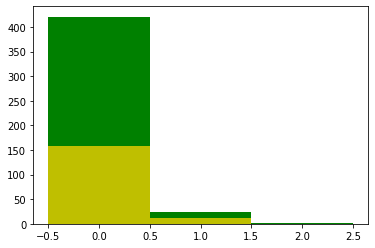

Bowler's Hitrate  :  0.05829596412556054
Bowlership's Hitrate  :  0.07017543859649122


Bowler's Skew     :  4.226945483606627
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.042710902915285
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


A Kumble Z Khan


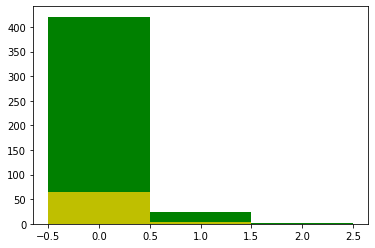

Bowler's Hitrate  :  0.05829596412556054
Bowlership's Hitrate  :  0.04411764705882353


Bowler's Skew     :  4.226945483606627
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.042710902915285
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


AD Mathews HMRKB Herath


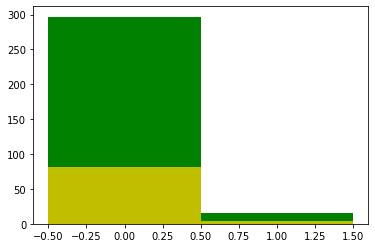

Bowler's Hitrate  :  0.04807692307692308
Bowlership's Hitrate  :  0.046511627906976744


Bowler's Skew     :  4.22498580476965
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.850505050505046
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Abdur Rehman Saeed Ajmal


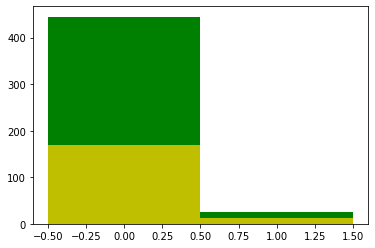

Bowler's Hitrate  :  0.055201698513800426
Bowlership's Hitrate  :  0.06629834254143646


Bowler's Skew     :  3.895357696242638
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  13.173811581676748
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Abdur Rehman Umar Gul


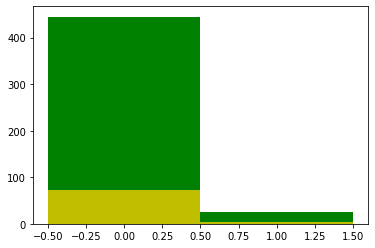

Bowler's Hitrate  :  0.055201698513800426
Bowlership's Hitrate  :  0.039473684210526314


Bowler's Skew     :  3.895357696242638
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  13.173811581676748
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


B Lee SR Clark


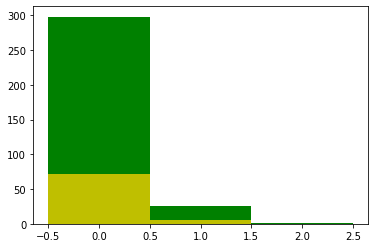

Bowler's Hitrate  :  0.08333333333333333
Bowlership's Hitrate  :  0.06578947368421052


Bowler's Skew     :  3.3989370764390525
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.109616560398287
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


BA Stokes MM Ali


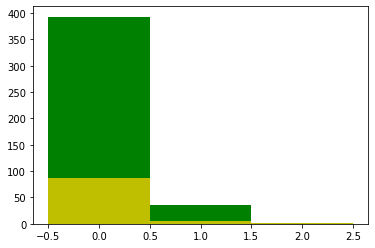

Bowler's Hitrate  :  0.08624708624708624
Bowlership's Hitrate  :  0.08602150537634409


Bowler's Skew     :  3.2341709029738492
Bowlership's Skew :  0.698375089427149
Bowler's Kurtosis     :  9.65811623766536
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


BA Stokes JM Anderson


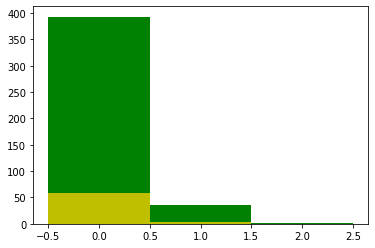

Bowler's Hitrate  :  0.08624708624708624
Bowlership's Hitrate  :  0.04838709677419355


Bowler's Skew     :  3.2341709029738492
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.65811623766536
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


CS Martin DL Vettori


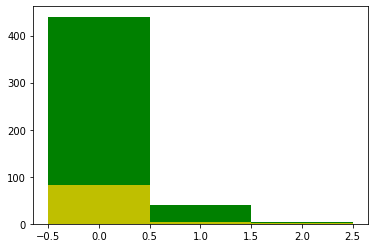

Bowler's Hitrate  :  0.09523809523809523
Bowlership's Hitrate  :  0.05813953488372093


Bowler's Skew     :  3.3425314957379237
Bowlership's Skew :  0.705616217735965
Bowler's Kurtosis     :  11.128439999999998
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.50, p=0.25 
Two-Sided : Statistics=6.50, p=0.51 
Less : Statistics=6.50, p=0.87 

____________________________________________


D Bishoo RL Chase


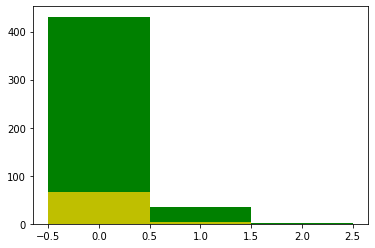

Bowler's Hitrate  :  0.07725321888412018
Bowlership's Hitrate  :  0.056338028169014086


Bowler's Skew     :  3.472672908981403
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.401262126135514
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DBL Powell JE Taylor


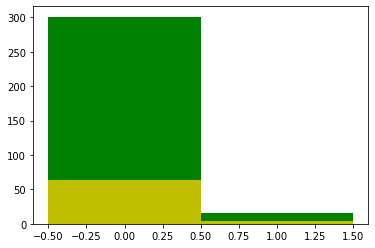

Bowler's Hitrate  :  0.04746835443037975
Bowlership's Hitrate  :  0.05970149253731343


Bowler's Skew     :  4.2563482650870865
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  16.116500553709862
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


DL Vettori CS Martin


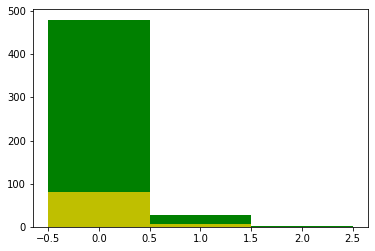

Bowler's Hitrate  :  0.05708661417322835
Bowlership's Hitrate  :  0.06976744186046512


Bowler's Skew     :  4.2366448484220465
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.0007250156579
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DL Vettori JS Patel


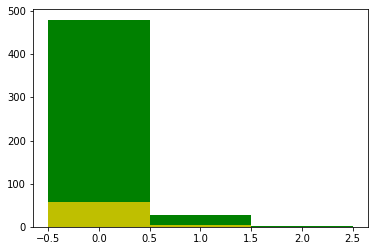

Bowler's Hitrate  :  0.05708661417322835
Bowlership's Hitrate  :  0.07936507936507936


Bowler's Skew     :  4.2366448484220465
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.0007250156579
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DW Steyn M Morkel


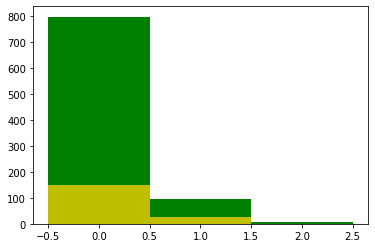

Bowler's Hitrate  :  0.12026726057906459
Bowlership's Hitrate  :  0.16


Bowler's Skew     :  2.81066724133693
Bowlership's Skew :  0.6275894148838348
Bowler's Kurtosis     :  7.396460266340386
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


DW Steyn M Ntini


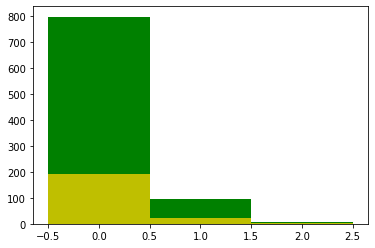

Bowler's Hitrate  :  0.12026726057906459
Bowlership's Hitrate  :  0.12962962962962962


Bowler's Skew     :  2.81066724133693
Bowlership's Skew :  0.6803899907858811
Bowler's Kurtosis     :  7.396460266340386
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


DW Steyn VD Philander


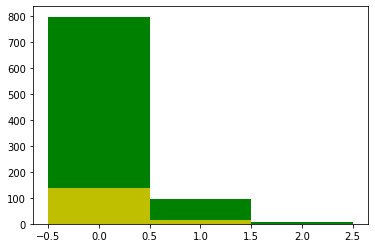

Bowler's Hitrate  :  0.12026726057906459
Bowlership's Hitrate  :  0.11038961038961038


Bowler's Skew     :  2.81066724133693
Bowlership's Skew :  0.6797666564329395
Bowler's Kurtosis     :  7.396460266340386
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Danish Kaneria Mohammad Sami


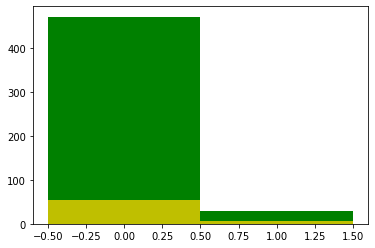

Bowler's Hitrate  :  0.05788423153692615
Bowlership's Hitrate  :  0.09836065573770492


Bowler's Skew     :  3.786463091980642
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.33730274693161
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Danish Kaneria Umar Gul


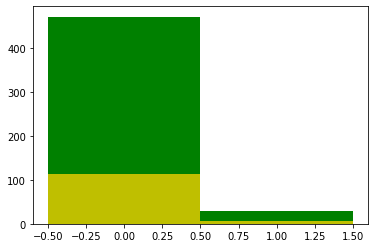

Bowler's Hitrate  :  0.05788423153692615
Bowlership's Hitrate  :  0.05785123966942149


Bowler's Skew     :  3.786463091980642
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.33730274693161
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


FH Edwards JE Taylor


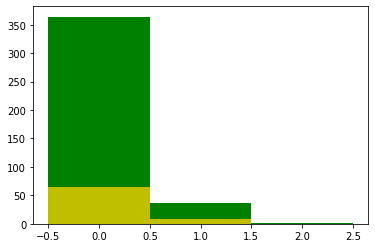

Bowler's Hitrate  :  0.09950248756218906
Bowlership's Hitrate  :  0.1095890410958904


Bowler's Skew     :  3.140703113586758
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.499573702171618
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


GP Swann MS Panesar


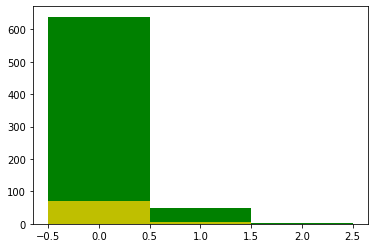

Bowler's Hitrate  :  0.07681159420289856
Bowlership's Hitrate  :  0.09210526315789473


Bowler's Skew     :  3.5806831276286277
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.51058945632839
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


GP Swann SCJ Broad


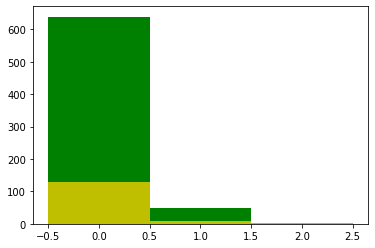

Bowler's Hitrate  :  0.07681159420289856
Bowlership's Hitrate  :  0.08633093525179857


Bowler's Skew     :  3.5806831276286277
Bowlership's Skew :  0.6942986403473793
Bowler's Kurtosis     :  12.51058945632839
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


GP Swann JM Anderson


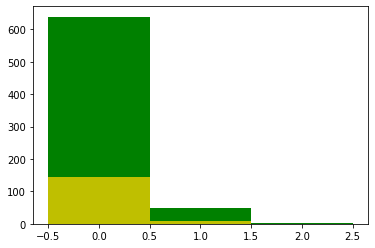

Bowler's Hitrate  :  0.07681159420289856
Bowlership's Hitrate  :  0.058823529411764705


Bowler's Skew     :  3.5806831276286277
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.51058945632839
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


GP Swann TT Bresnan


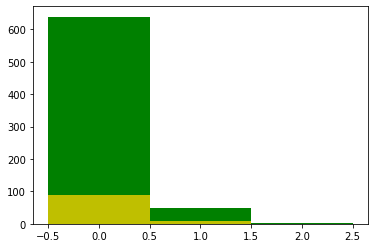

Bowler's Hitrate  :  0.07681159420289856
Bowlership's Hitrate  :  0.08333333333333333


Bowler's Skew     :  3.5806831276286277
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.51058945632839
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


HMRKB Herath N Pradeep


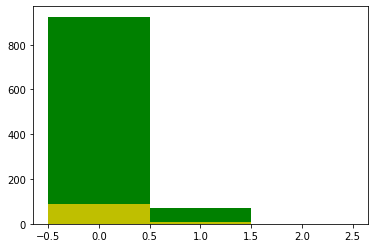

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.0625


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


HMRKB Herath RAS Lakmal


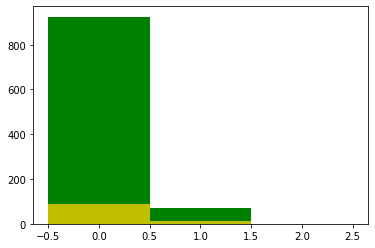

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.13725490196078433


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.6654688661238352
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


HMRKB Herath AD Mathews


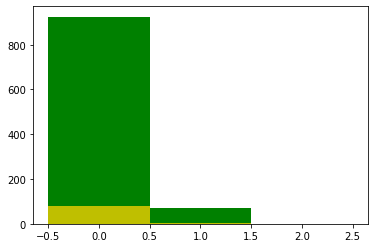

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.05813953488372093


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


HMRKB Herath MDK Perera


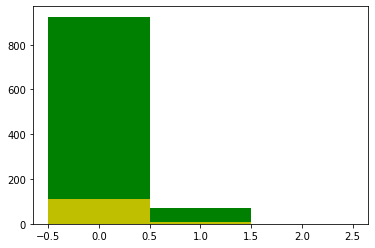

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.059322033898305086


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


HMRKB Herath RMS Eranga


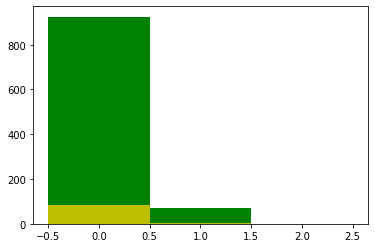

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.034482758620689655


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


HMRKB Herath S Randiv


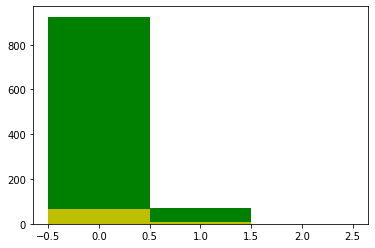

Bowler's Hitrate  :  0.07414829659318638
Bowlership's Hitrate  :  0.08450704225352113


Bowler's Skew     :  3.4096963635350903
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.385876307509784
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Harbhajan Singh A Kumble


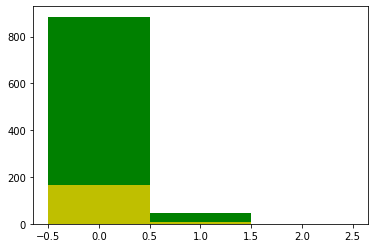

Bowler's Hitrate  :  0.050483351235230935
Bowlership's Hitrate  :  0.04093567251461988


Bowler's Skew     :  4.39092149080464
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.851623062721252
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Harbhajan Singh Z Khan


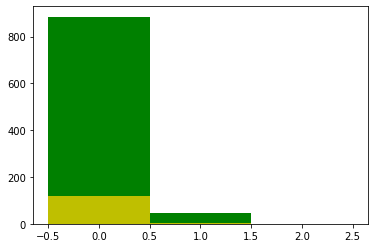

Bowler's Hitrate  :  0.050483351235230935
Bowlership's Hitrate  :  0.03305785123966942


Bowler's Skew     :  4.39092149080464
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.851623062721252
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Harbhajan Singh I Sharma


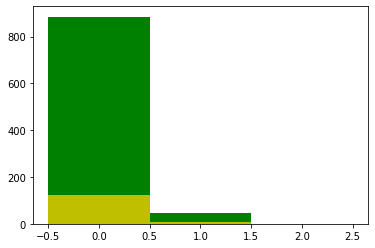

Bowler's Hitrate  :  0.050483351235230935
Bowlership's Hitrate  :  0.06201550387596899


Bowler's Skew     :  4.39092149080464
Bowlership's Skew :  0.70286604616233
Bowler's Kurtosis     :  18.851623062721252
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


Harbhajan Singh A Mishra


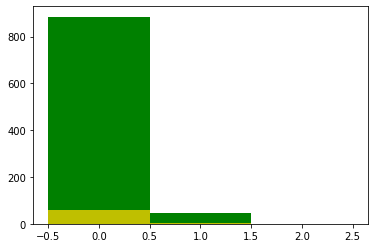

Bowler's Hitrate  :  0.050483351235230935
Bowlership's Hitrate  :  0.04838709677419355


Bowler's Skew     :  4.39092149080464
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.851623062721252
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Harbhajan Singh PP Ojha


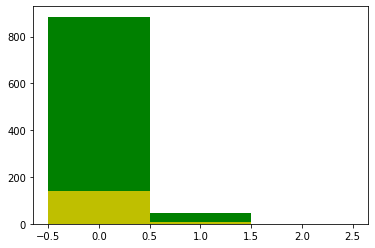

Bowler's Hitrate  :  0.050483351235230935
Bowlership's Hitrate  :  0.047619047619047616


Bowler's Skew     :  4.39092149080464
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.851623062721252
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


I Sharma Harbhajan Singh


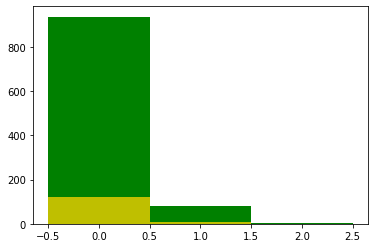

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.06976744186046512


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


I Sharma Mohammed Shami


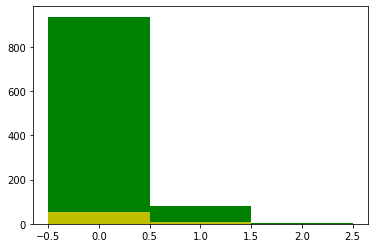

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.15625


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.6621731449431258
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


I Sharma UT Yadav


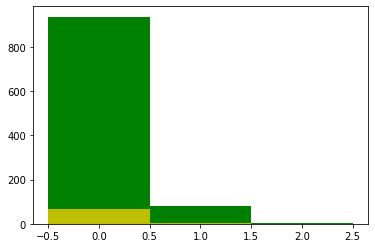

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.06944444444444445


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


I Sharma R Ashwin


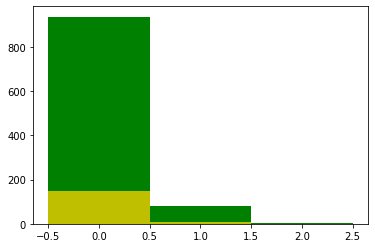

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.056962025316455694


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


I Sharma Z Khan


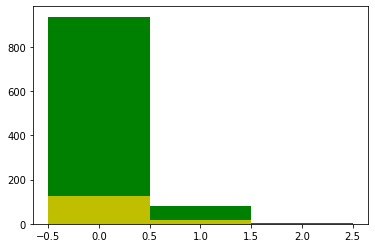

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.10638297872340426


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


I Sharma PP Ojha


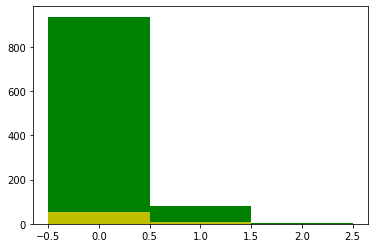

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.16129032258064516


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.6584732312716783
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


I Sharma RA Jadeja


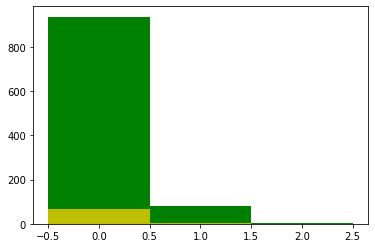

Bowler's Hitrate  :  0.08619000979431929
Bowlership's Hitrate  :  0.07246376811594203


Bowler's Skew     :  3.4008715174779502
Bowlership's Skew :  0.7047042291017759
Bowler's Kurtosis     :  11.30119921512405
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=8.00, p=0.10 
Two-Sided : Statistics=8.00, p=0.19 
Less : Statistics=8.00, p=0.96 

____________________________________________


JE Taylor KAJ Roach


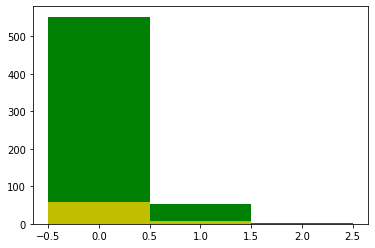

Bowler's Hitrate  :  0.09539473684210527
Bowlership's Hitrate  :  0.109375


Bowler's Skew     :  3.0980261777824856
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922218281563627
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JE Taylor SJ Benn


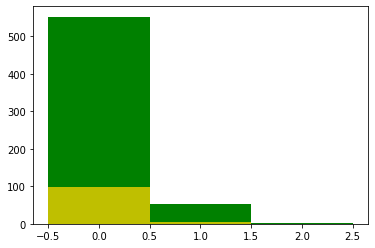

Bowler's Hitrate  :  0.09539473684210527
Bowlership's Hitrate  :  0.0392156862745098


Bowler's Skew     :  3.0980261777824856
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922218281563627
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JE Taylor FH Edwards


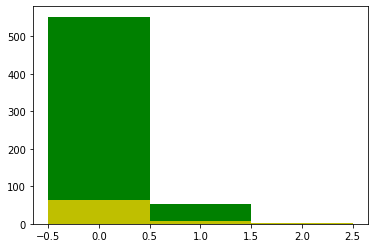

Bowler's Hitrate  :  0.09539473684210527
Bowlership's Hitrate  :  0.136986301369863


Bowler's Skew     :  3.0980261777824856
Bowlership's Skew :  0.674555484545766
Bowler's Kurtosis     :  8.922218281563627
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


JE Taylor DBL Powell


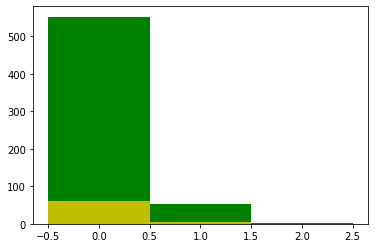

Bowler's Hitrate  :  0.09539473684210527
Bowlership's Hitrate  :  0.07462686567164178


Bowler's Skew     :  3.0980261777824856
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922218281563627
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JH Kallis PL Harris


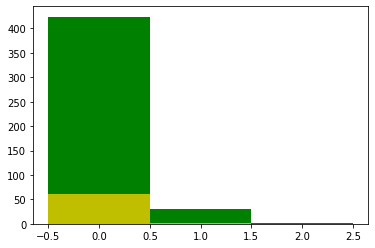

Bowler's Hitrate  :  0.07236842105263158
Bowlership's Hitrate  :  0.03225806451612903


Bowler's Skew     :  3.6401703634170146
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.766708846371312
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JH Kallis A Nel


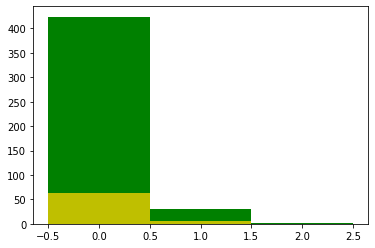

Bowler's Hitrate  :  0.07236842105263158
Bowlership's Hitrate  :  0.08571428571428572


Bowler's Skew     :  3.6401703634170146
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.766708846371312
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JH Kallis M Morkel


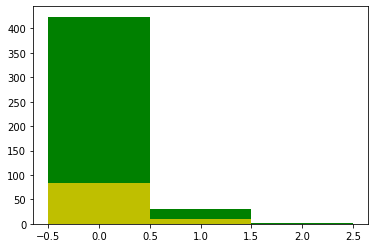

Bowler's Hitrate  :  0.07236842105263158
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.6401703634170146
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.766708846371312
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JM Anderson SCJ Broad


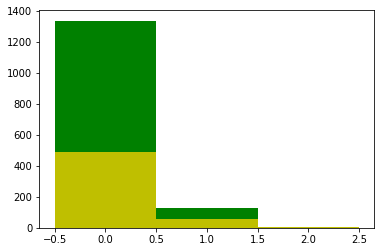

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.11678832116788321


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.676759777878376
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


JM Anderson MS Panesar


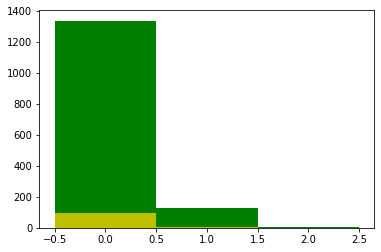

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.06796116504854369


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


JM Anderson CT Tremlett


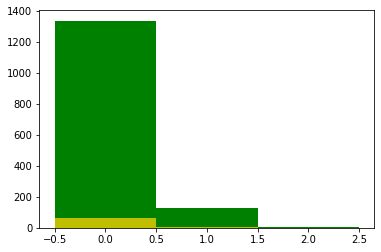

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.1323529411764706


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.6800415614518422
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


JM Anderson ST Finn


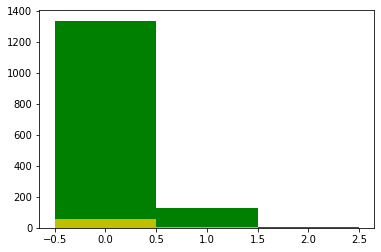

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.12903225806451613


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.6848352199665303
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -1.5


Greater : Statistics=8.00, p=0.10 
Two-Sided : Statistics=8.00, p=0.19 
Less : Statistics=8.00, p=0.96 

____________________________________________


JM Anderson BA Stokes


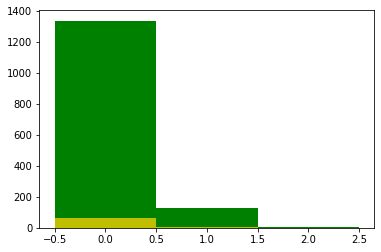

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.03225806451612903


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.19 
Two-Sided : Statistics=5.00, p=0.39 
Less : Statistics=5.00, p=0.93 

____________________________________________


JM Anderson GP Swann


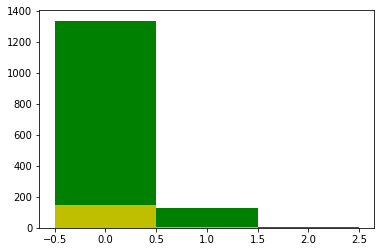

Bowler's Hitrate  :  0.09775967413441955
Bowlership's Hitrate  :  0.05228758169934641


Bowler's Skew     :  3.1656398180576093
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.652526457765799
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JO Holder AS Joseph


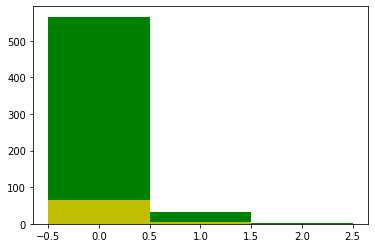

Bowler's Hitrate  :  0.05518394648829431
Bowlership's Hitrate  :  0.058823529411764705


Bowler's Skew     :  4.274548630214632
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.193312927689956
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JO Holder KAJ Roach


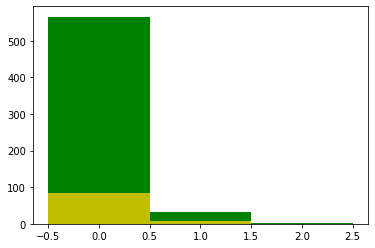

Bowler's Hitrate  :  0.05518394648829431
Bowlership's Hitrate  :  0.09574468085106383


Bowler's Skew     :  4.274548630214632
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.193312927689956
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JO Holder ST Gabriel


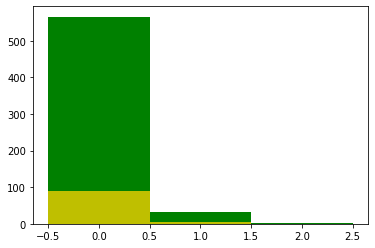

Bowler's Hitrate  :  0.05518394648829431
Bowlership's Hitrate  :  0.0425531914893617


Bowler's Skew     :  4.274548630214632
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  18.193312927689956
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JO Holder RL Chase


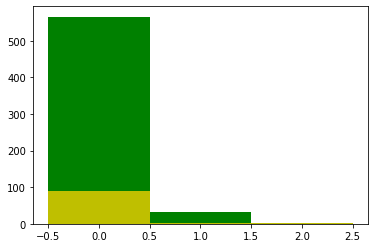

Bowler's Hitrate  :  0.05518394648829431
Bowlership's Hitrate  :  0.05263157894736842


Bowler's Skew     :  4.274548630214632
Bowlership's Skew :  0.7059022840192152
Bowler's Kurtosis     :  18.193312927689956
Bowlership's Kurtosis :  -1.5


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


JR Hazlewood PJ Cummins


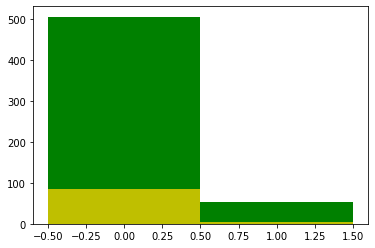

Bowler's Hitrate  :  0.09498207885304659
Bowlership's Hitrate  :  0.0449438202247191


Bowler's Skew     :  2.762834121304057
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.633252381841958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


JR Hazlewood MA Starc


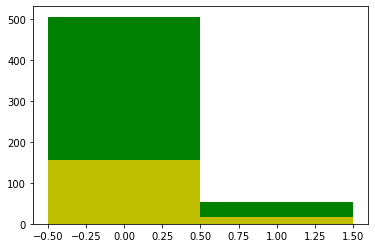

Bowler's Hitrate  :  0.09498207885304659
Bowlership's Hitrate  :  0.09883720930232558


Bowler's Skew     :  2.762834121304057
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.633252381841958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


JR Hazlewood NM Lyon


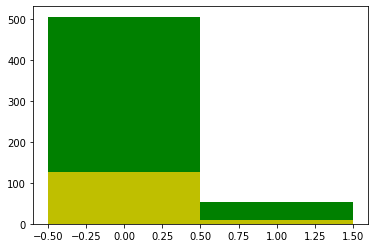

Bowler's Hitrate  :  0.09498207885304659
Bowlership's Hitrate  :  0.072992700729927


Bowler's Skew     :  2.762834121304057
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.633252381841958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


K Rabada KA Maharaj


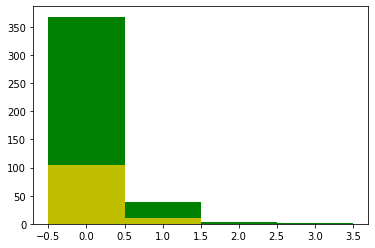

Bowler's Hitrate  :  0.11463414634146342
Bowlership's Hitrate  :  0.08695652173913043


Bowler's Skew     :  3.6078898835648254
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.633686057403562
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


K Rabada VD Philander


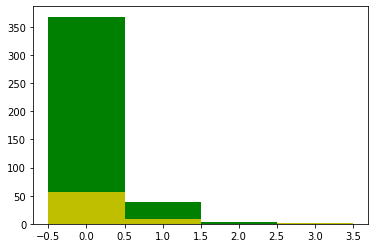

Bowler's Hitrate  :  0.11463414634146342
Bowlership's Hitrate  :  0.16923076923076924


Bowler's Skew     :  3.6078898835648254
Bowlership's Skew :  0.6638677538275857
Bowler's Kurtosis     :  15.633686057403562
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=6.50, p=0.50 
Two-Sided : Statistics=6.50, p=1.00 
Less : Statistics=6.50, p=0.64 

____________________________________________


KA Maharaj K Rabada


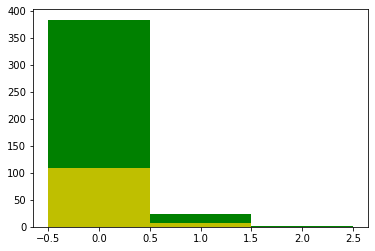

Bowler's Hitrate  :  0.06142506142506143
Bowlership's Hitrate  :  0.06086956521739131


Bowler's Skew     :  4.115457455579038
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  17.07095666038709
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


KA Maharaj VD Philander


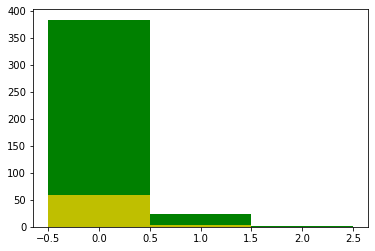

Bowler's Hitrate  :  0.06142506142506143
Bowlership's Hitrate  :  0.04838709677419355


Bowler's Skew     :  4.115457455579038
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  17.07095666038709
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


KAJ Roach JO Holder


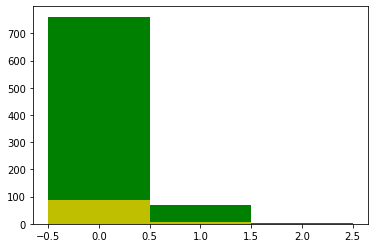

Bowler's Hitrate  :  0.08883553421368548
Bowlership's Hitrate  :  0.0851063829787234


Bowler's Skew     :  3.173779404978144
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.24237668037015
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


KAJ Roach JE Taylor


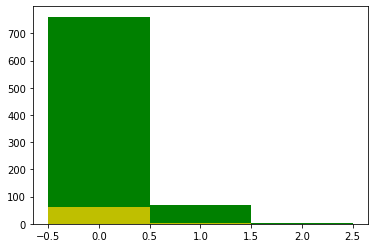

Bowler's Hitrate  :  0.08883553421368548
Bowlership's Hitrate  :  0.0625


Bowler's Skew     :  3.173779404978144
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.24237668037015
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KAJ Roach SJ Benn


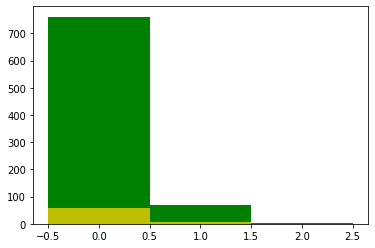

Bowler's Hitrate  :  0.08883553421368548
Bowlership's Hitrate  :  0.09230769230769231


Bowler's Skew     :  3.173779404978144
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.24237668037015
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KAJ Roach ST Gabriel


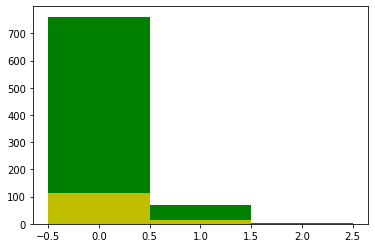

Bowler's Hitrate  :  0.08883553421368548
Bowlership's Hitrate  :  0.12403100775193798


Bowler's Skew     :  3.173779404978144
Bowlership's Skew :  0.6721033786115069
Bowler's Kurtosis     :  9.24237668037015
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


M Morkel DW Steyn


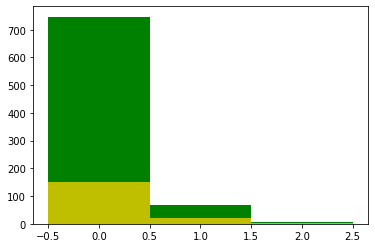

Bowler's Hitrate  :  0.09622411693057248
Bowlership's Hitrate  :  0.14857142857142858


Bowler's Skew     :  3.3074738109504027
Bowlership's Skew :  0.6727045556825862
Bowler's Kurtosis     :  10.850792631481664
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


M Morkel JH Kallis


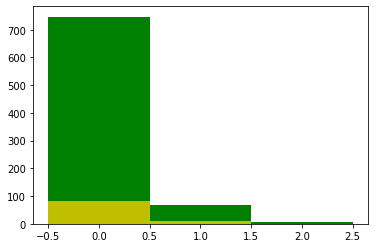

Bowler's Hitrate  :  0.09622411693057248
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.3074738109504027
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.850792631481664
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


M Morkel VD Philander


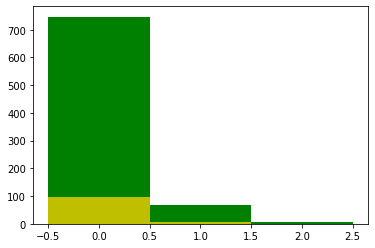

Bowler's Hitrate  :  0.09622411693057248
Bowlership's Hitrate  :  0.09615384615384616


Bowler's Skew     :  3.3074738109504027
Bowlership's Skew :  0.6929193609610957
Bowler's Kurtosis     :  10.850792631481664
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


M Morkel PL Harris


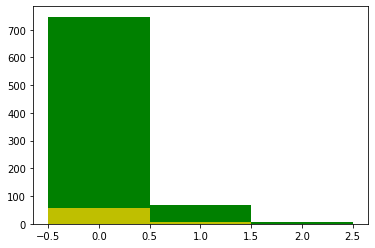

Bowler's Hitrate  :  0.09622411693057248
Bowlership's Hitrate  :  0.08064516129032258


Bowler's Skew     :  3.3074738109504027
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.850792631481664
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


M Muralitharan WPUJC Vaas


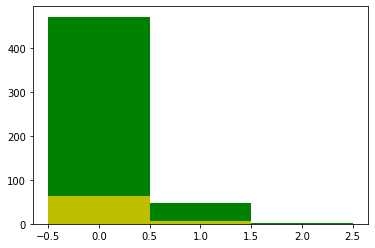

Bowler's Hitrate  :  0.09807692307692308
Bowlership's Hitrate  :  0.08571428571428572


Bowler's Skew     :  3.083085526713569
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922347850837124
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


M Muralitharan SL Malinga


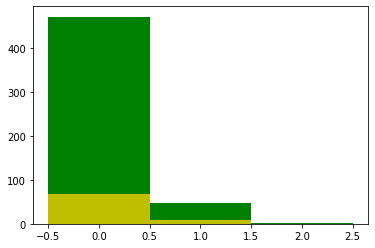

Bowler's Hitrate  :  0.09807692307692308
Bowlership's Hitrate  :  0.11842105263157894


Bowler's Skew     :  3.083085526713569
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922347850837124
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


M Muralitharan MF Maharoof


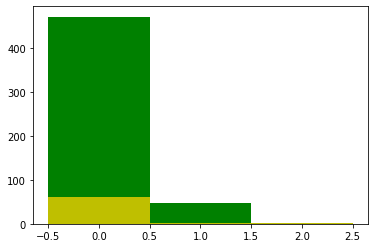

Bowler's Hitrate  :  0.09807692307692308
Bowlership's Hitrate  :  0.06349206349206349


Bowler's Skew     :  3.083085526713569
Bowlership's Skew :  0.7064096536659156
Bowler's Kurtosis     :  8.922347850837124
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.50, p=0.25 
Two-Sided : Statistics=6.50, p=0.51 
Less : Statistics=6.50, p=0.87 

____________________________________________


M Muralitharan CRD Fernando


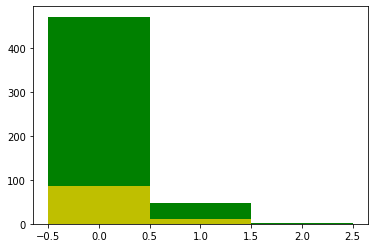

Bowler's Hitrate  :  0.09807692307692308
Bowlership's Hitrate  :  0.10526315789473684


Bowler's Skew     :  3.083085526713569
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.922347850837124
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


M Ntini DW Steyn


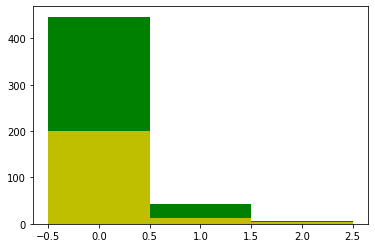

Bowler's Hitrate  :  0.10707070707070707
Bowlership's Hitrate  :  0.08796296296296297


Bowler's Skew     :  3.2795930778581472
Bowlership's Skew :  0.7006516376041458
Bowler's Kurtosis     :  10.796378506827129
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


MA Starc JR Hazlewood


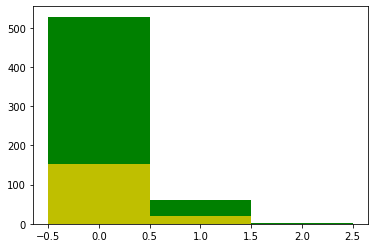

Bowler's Hitrate  :  0.10847457627118644
Bowlership's Hitrate  :  0.11627906976744186


Bowler's Skew     :  2.8193443427104987
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.0621132288297535
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MA Starc NM Lyon


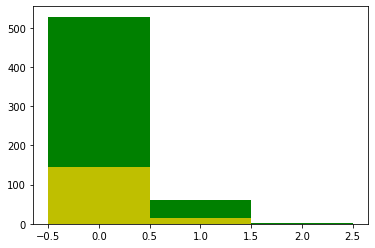

Bowler's Hitrate  :  0.10847457627118644
Bowlership's Hitrate  :  0.09375


Bowler's Skew     :  2.8193443427104987
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.0621132288297535
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MDK Perera RAS Lakmal


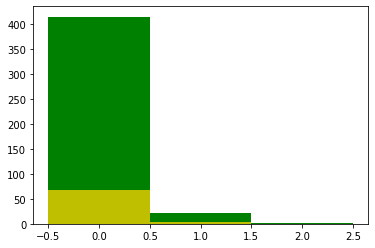

Bowler's Hitrate  :  0.05491990846681922
Bowlership's Hitrate  :  0.05555555555555555


Bowler's Skew     :  4.40877542087288
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  19.860259773186694
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MDK Perera HMRKB Herath


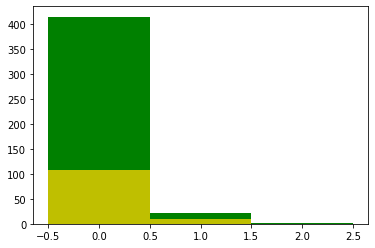

Bowler's Hitrate  :  0.05491990846681922
Bowlership's Hitrate  :  0.0847457627118644


Bowler's Skew     :  4.40877542087288
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  19.860259773186694
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MG Johnson NM Lyon


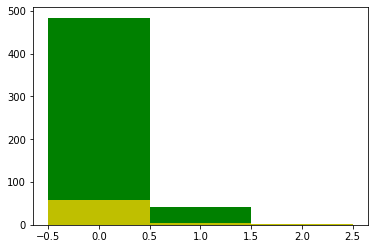

Bowler's Hitrate  :  0.08538899430740038
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.412132733499229
Bowlership's Skew :  0.6998988315081754
Bowler's Kurtosis     :  11.366619657377498
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


MM Ali BA Stokes


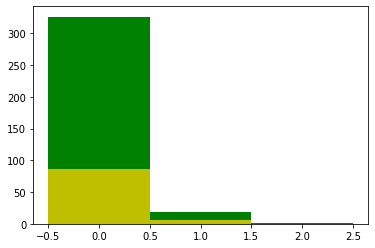

Bowler's Hitrate  :  0.06358381502890173
Bowlership's Hitrate  :  0.06451612903225806


Bowler's Skew     :  4.454105132222595
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  20.991976828820178
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MM Ali SCJ Broad


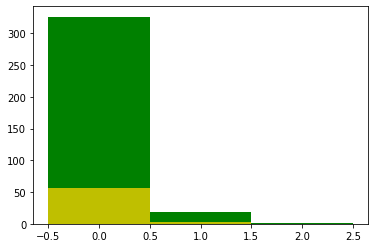

Bowler's Hitrate  :  0.06358381502890173
Bowlership's Hitrate  :  0.05


Bowler's Skew     :  4.454105132222595
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  20.991976828820178
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MS Panesar SCJ Broad


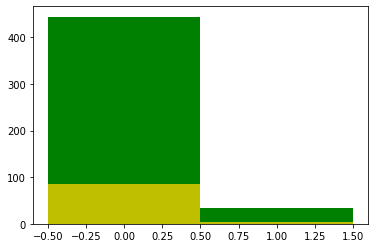

Bowler's Hitrate  :  0.06918238993710692
Bowlership's Hitrate  :  0.044444444444444446


Bowler's Skew     :  3.395418940111775
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.52886977886977
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


MS Panesar JM Anderson


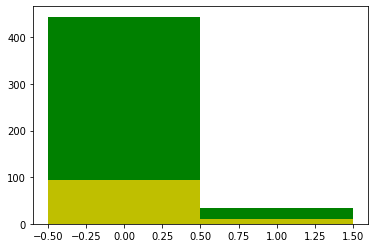

Bowler's Hitrate  :  0.06918238993710692
Bowlership's Hitrate  :  0.0970873786407767


Bowler's Skew     :  3.395418940111775
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.52886977886977
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


MS Panesar GP Swann


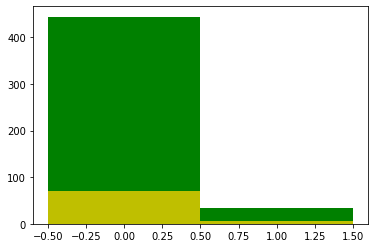

Bowler's Hitrate  :  0.06918238993710692
Bowlership's Hitrate  :  0.06578947368421052


Bowler's Skew     :  3.395418940111775
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.52886977886977
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Mohammad Amir Yasir Shah


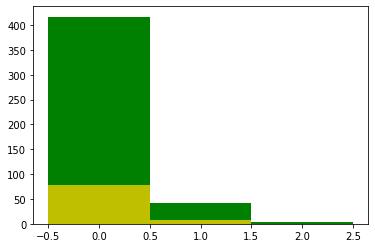

Bowler's Hitrate  :  0.1019522776572668
Bowlership's Hitrate  :  0.08235294117647059


Bowler's Skew     :  3.192323585146457
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.022136066587677
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammad Amir Mohammad Asif


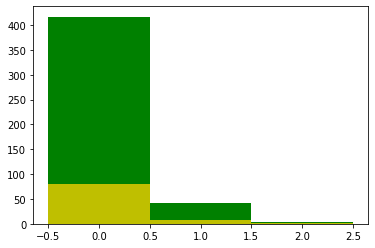

Bowler's Hitrate  :  0.1019522776572668
Bowlership's Hitrate  :  0.10227272727272728


Bowler's Skew     :  3.192323585146457
Bowlership's Skew :  0.6923305040330037
Bowler's Kurtosis     :  10.022136066587677
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mohammad Asif Umar Gul


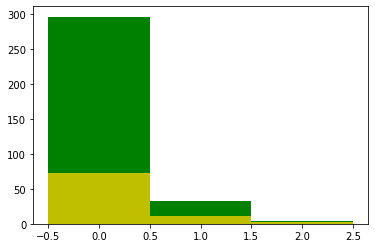

Bowler's Hitrate  :  0.12048192771084337
Bowlership's Hitrate  :  0.1744186046511628


Bowler's Skew     :  3.070223172996188
Bowlership's Skew :  0.6642313904446332
Bowler's Kurtosis     :  9.308583785076529
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mohammad Asif Mohammad Amir


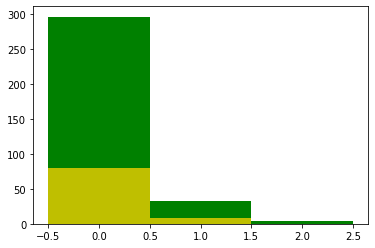

Bowler's Hitrate  :  0.12048192771084337
Bowlership's Hitrate  :  0.09090909090909091


Bowler's Skew     :  3.070223172996188
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.308583785076529
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammed Shami R Ashwin


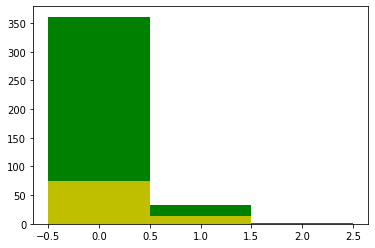

Bowler's Hitrate  :  0.08860759493670886
Bowlership's Hitrate  :  0.15730337078651685


Bowler's Skew     :  3.1935695551943764
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.422180062590598
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammed Shami I Sharma


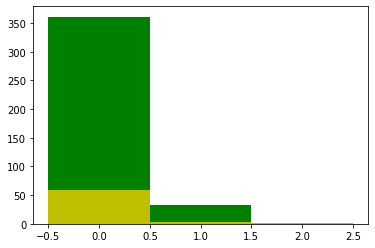

Bowler's Hitrate  :  0.08860759493670886
Bowlership's Hitrate  :  0.09375


Bowler's Skew     :  3.1935695551943764
Bowlership's Skew :  0.7003985986924386
Bowler's Kurtosis     :  9.422180062590598
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


N Pradeep RAS Lakmal


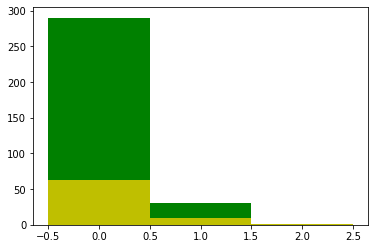

Bowler's Hitrate  :  0.10248447204968944
Bowlership's Hitrate  :  0.1506849315068493


Bowler's Skew     :  2.920179447956419
Bowlership's Skew :  0.6626059534903224
Bowler's Kurtosis     :  7.665117169430731
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


N Pradeep HMRKB Herath


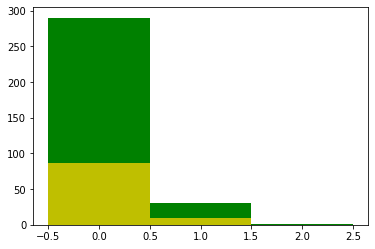

Bowler's Hitrate  :  0.10248447204968944
Bowlership's Hitrate  :  0.10416666666666667


Bowler's Skew     :  2.920179447956419
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.665117169430731
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


N Wagner C de Grandhomme


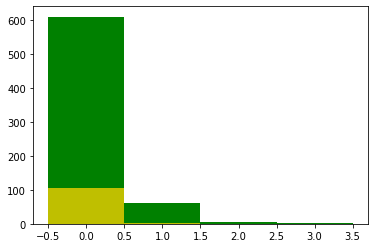

Bowler's Hitrate  :  0.10798816568047337
Bowlership's Hitrate  :  0.018691588785046728


Bowler's Skew     :  3.492068153488079
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.338276908003714
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.59 
Two-Sided : Statistics=4.00, p=0.82 
Less : Statistics=4.00, p=0.59 

____________________________________________


N Wagner TG Southee


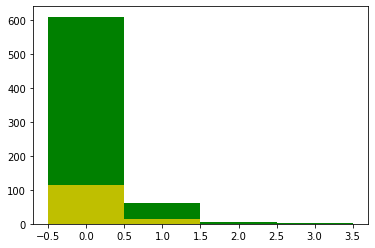

Bowler's Hitrate  :  0.10798816568047337
Bowlership's Hitrate  :  0.109375


Bowler's Skew     :  3.492068153488079
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.338276908003714
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


N Wagner TA Boult


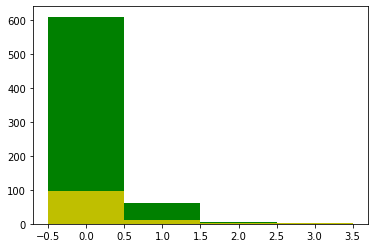

Bowler's Hitrate  :  0.10798816568047337
Bowlership's Hitrate  :  0.18584070796460178


Bowler's Skew     :  3.492068153488079
Bowlership's Skew :  1.1183096258607161
Bowler's Kurtosis     :  14.338276908003714
Bowlership's Kurtosis :  -0.6969649845732326


Greater : Statistics=9.50, p=0.39 
Two-Sided : Statistics=9.50, p=0.77 
Less : Statistics=9.50, p=0.72 

____________________________________________


N Wagner MJ Santner


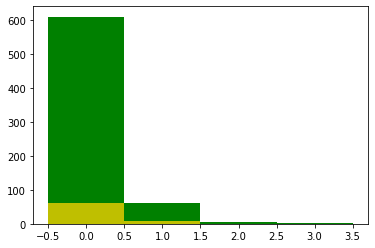

Bowler's Hitrate  :  0.10798816568047337
Bowlership's Hitrate  :  0.10294117647058823


Bowler's Skew     :  3.492068153488079
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.338276908003714
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.59 
Two-Sided : Statistics=4.00, p=0.82 
Less : Statistics=4.00, p=0.59 

____________________________________________


NM Lyon MA Starc


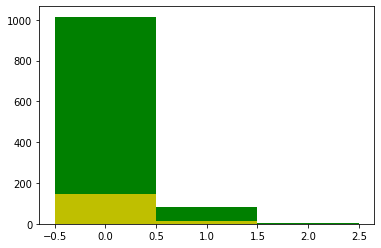

Bowler's Hitrate  :  0.08083560399636694
Bowlership's Hitrate  :  0.10625


Bowler's Skew     :  3.4329470387248664
Bowlership's Skew :  0.6820994572163502
Bowler's Kurtosis     :  11.278463906822505
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


NM Lyon MG Johnson


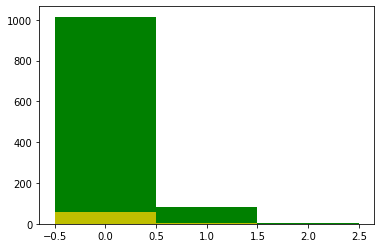

Bowler's Hitrate  :  0.08083560399636694
Bowlership's Hitrate  :  0.03225806451612903


Bowler's Skew     :  3.4329470387248664
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.278463906822505
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.19 
Two-Sided : Statistics=5.00, p=0.39 
Less : Statistics=5.00, p=0.93 

____________________________________________


NM Lyon PM Siddle


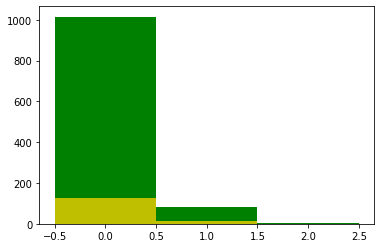

Bowler's Hitrate  :  0.08083560399636694
Bowlership's Hitrate  :  0.1


Bowler's Skew     :  3.4329470387248664
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.278463906822505
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


NM Lyon PJ Cummins


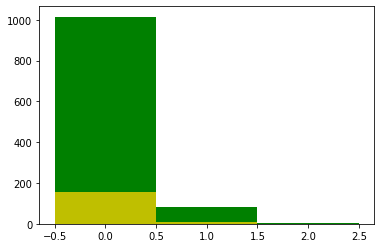

Bowler's Hitrate  :  0.08083560399636694
Bowlership's Hitrate  :  0.06666666666666667


Bowler's Skew     :  3.4329470387248664
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.278463906822505
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


NM Lyon JR Hazlewood


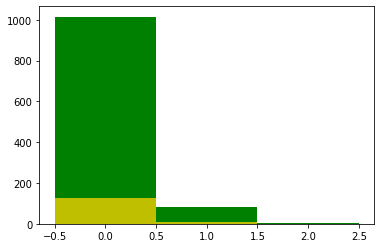

Bowler's Hitrate  :  0.08083560399636694
Bowlership's Hitrate  :  0.072992700729927


Bowler's Skew     :  3.4329470387248664
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.278463906822505
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


PJ Cummins NM Lyon


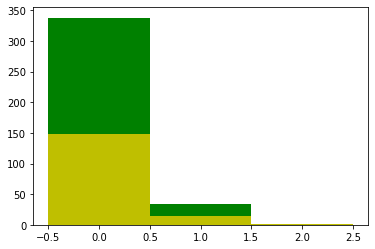

Bowler's Hitrate  :  0.10160427807486631
Bowlership's Hitrate  :  0.10303030303030303


Bowler's Skew     :  3.1186316910519696
Bowlership's Skew :  0.6838234682236952
Bowler's Kurtosis     :  9.383069332126285
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


PJ Cummins JR Hazlewood


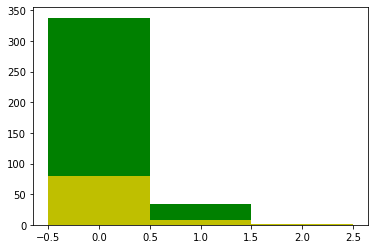

Bowler's Hitrate  :  0.10160427807486631
Bowlership's Hitrate  :  0.11235955056179775


Bowler's Skew     :  3.1186316910519696
Bowlership's Skew :  0.6867781774004409
Bowler's Kurtosis     :  9.383069332126285
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


PM Siddle BW Hilfenhaus


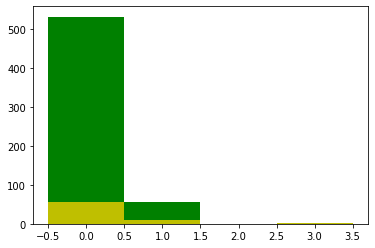

Bowler's Hitrate  :  0.10034013605442177
Bowlership's Hitrate  :  0.18181818181818182


Bowler's Skew     :  3.4506996379665456
Bowlership's Skew :  0.649886323088921
Bowler's Kurtosis     :  15.098496052431305
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.65 
Less : Statistics=6.00, p=0.82 

____________________________________________


PM Siddle NM Lyon


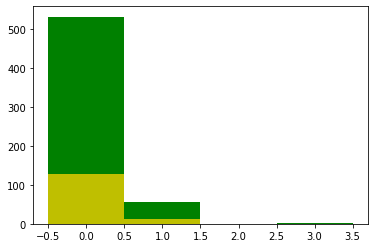

Bowler's Hitrate  :  0.10034013605442177
Bowlership's Hitrate  :  0.08571428571428572


Bowler's Skew     :  3.4506996379665456
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.098496052431305
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


PP Ojha Harbhajan Singh


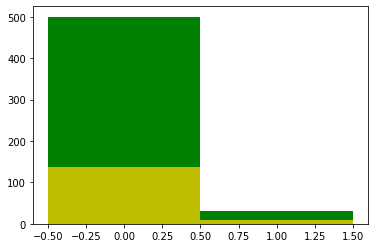

Bowler's Hitrate  :  0.06015037593984962
Bowlership's Hitrate  :  0.061224489795918366


Bowler's Skew     :  3.699864862397002
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.688999999999998
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


PP Ojha I Sharma


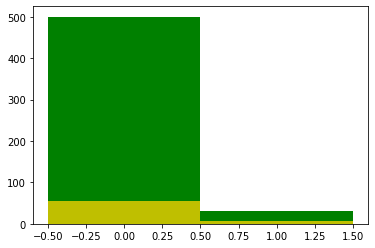

Bowler's Hitrate  :  0.06015037593984962
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.699864862397002
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.688999999999998
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


PP Ojha R Ashwin


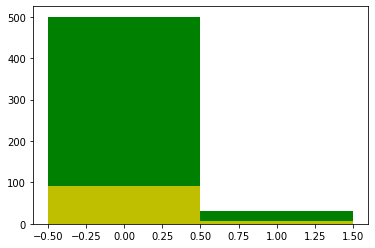

Bowler's Hitrate  :  0.06015037593984962
Bowlership's Hitrate  :  0.061224489795918366


Bowler's Skew     :  3.699864862397002
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.688999999999998
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


R Ashwin Mohammed Shami


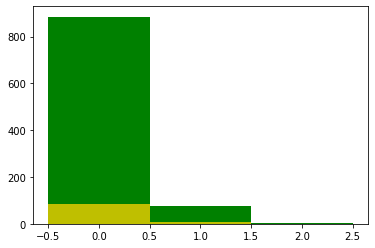

Bowler's Hitrate  :  0.08506224066390042
Bowlership's Hitrate  :  0.06741573033707865


Bowler's Skew     :  3.351599911006071
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.750561094040597
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


R Ashwin PP Ojha


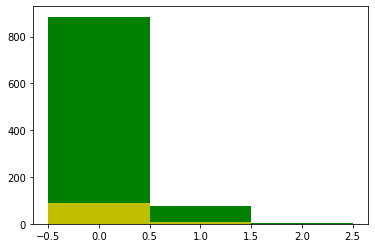

Bowler's Hitrate  :  0.08506224066390042
Bowlership's Hitrate  :  0.11224489795918367


Bowler's Skew     :  3.351599911006071
Bowlership's Skew :  0.6851529102975947
Bowler's Kurtosis     :  10.750561094040597
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


R Ashwin I Sharma


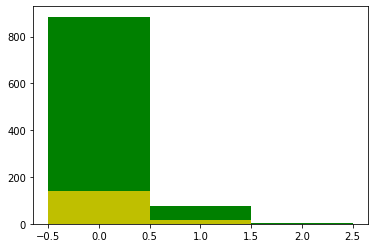

Bowler's Hitrate  :  0.08506224066390042
Bowlership's Hitrate  :  0.12025316455696203


Bowler's Skew     :  3.351599911006071
Bowlership's Skew :  0.6720629029002243
Bowler's Kurtosis     :  10.750561094040597
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


R Ashwin UT Yadav


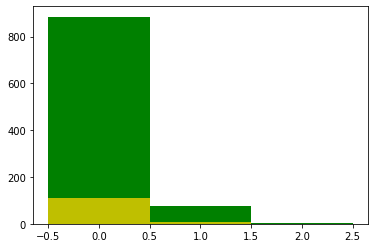

Bowler's Hitrate  :  0.08506224066390042
Bowlership's Hitrate  :  0.06779661016949153


Bowler's Skew     :  3.351599911006071
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.750561094040597
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


R Ashwin RA Jadeja


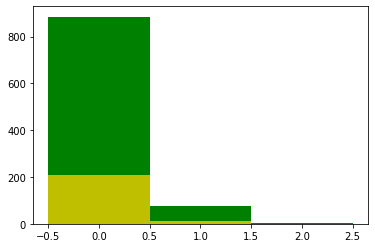

Bowler's Hitrate  :  0.08506224066390042
Bowlership's Hitrate  :  0.05454545454545454


Bowler's Skew     :  3.351599911006071
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.750561094040597
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


RA Jadeja I Sharma


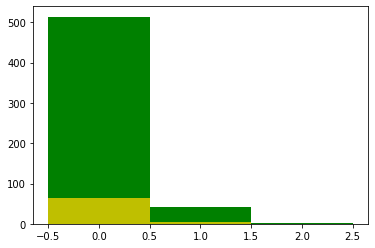

Bowler's Hitrate  :  0.08422939068100359
Bowlership's Hitrate  :  0.07246376811594203


Bowler's Skew     :  3.595542515793388
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  13.072023140758205
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


RA Jadeja R Ashwin


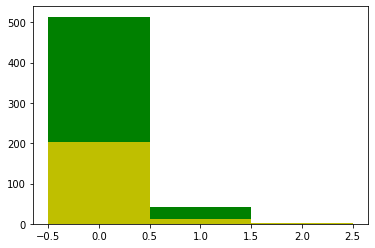

Bowler's Hitrate  :  0.08422939068100359
Bowlership's Hitrate  :  0.08636363636363636


Bowler's Skew     :  3.595542515793388
Bowlership's Skew :  0.7009117044944699
Bowler's Kurtosis     :  13.072023140758205
Bowlership's Kurtosis :  -1.5


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


RAS Lakmal N Pradeep


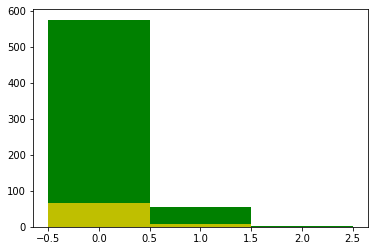

Bowler's Hitrate  :  0.0947867298578199
Bowlership's Hitrate  :  0.0958904109589041


Bowler's Skew     :  3.100722935417197
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.913617644298487
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


RAS Lakmal MDK Perera


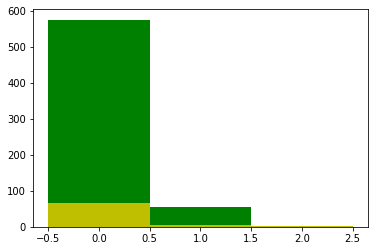

Bowler's Hitrate  :  0.0947867298578199
Bowlership's Hitrate  :  0.08333333333333333


Bowler's Skew     :  3.100722935417197
Bowlership's Skew :  0.701955865358387
Bowler's Kurtosis     :  8.913617644298487
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


RAS Lakmal HMRKB Herath


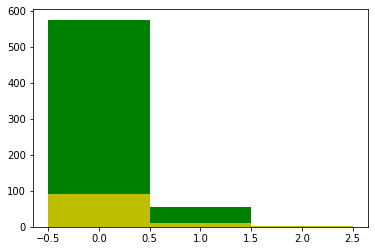

Bowler's Hitrate  :  0.0947867298578199
Bowlership's Hitrate  :  0.11764705882352941


Bowler's Skew     :  3.100722935417197
Bowlership's Skew :  0.6809718997018467
Bowler's Kurtosis     :  8.913617644298487
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


RL Chase JO Holder


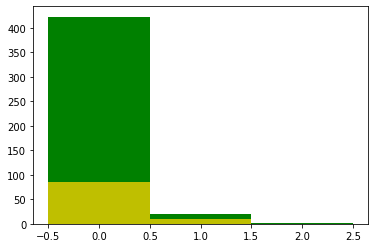

Bowler's Hitrate  :  0.051685393258426963
Bowlership's Hitrate  :  0.09473684210526316


Bowler's Skew     :  4.583612709573465
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  21.641432460036416
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


RL Chase ST Gabriel


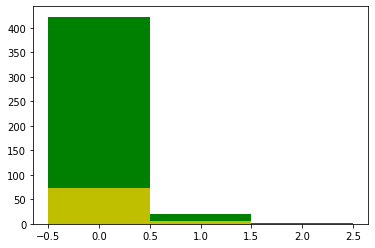

Bowler's Hitrate  :  0.051685393258426963
Bowlership's Hitrate  :  0.075


Bowler's Skew     :  4.583612709573465
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  21.641432460036416
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


RL Chase D Bishoo


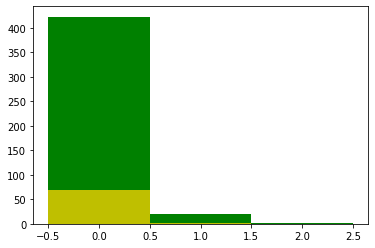

Bowler's Hitrate  :  0.051685393258426963
Bowlership's Hitrate  :  0.014084507042253521


Bowler's Skew     :  4.583612709573465
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  21.641432460036416
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.50, p=0.50 
Two-Sided : Statistics=3.50, p=1.00 
Less : Statistics=3.50, p=0.72 

____________________________________________


S Shillingford SJ Benn


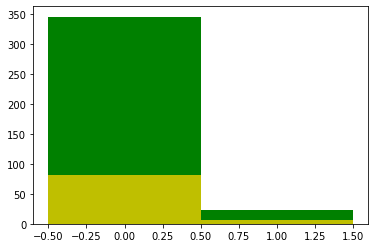

Bowler's Hitrate  :  0.06233062330623306
Bowlership's Hitrate  :  0.06818181818181818


Bowler's Skew     :  3.620766804049781
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.109952249308876
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


SCJ Broad MS Panesar


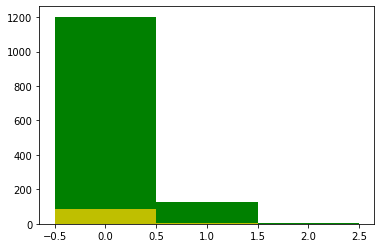

Bowler's Hitrate  :  0.10194902548725637
Bowlership's Hitrate  :  0.06666666666666667


Bowler's Skew     :  2.922462700026251
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.65778713499968
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


SCJ Broad CR Woakes


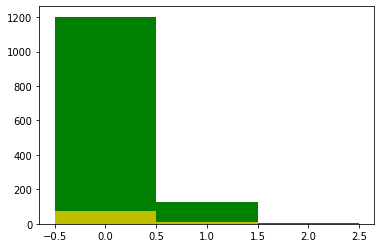

Bowler's Hitrate  :  0.10194902548725637
Bowlership's Hitrate  :  0.11627906976744186


Bowler's Skew     :  2.922462700026251
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.65778713499968
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


SCJ Broad JM Anderson


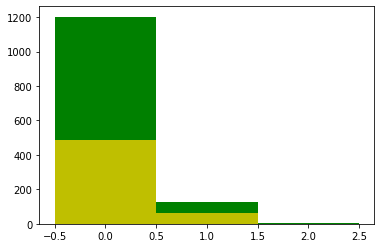

Bowler's Hitrate  :  0.10194902548725637
Bowlership's Hitrate  :  0.11313868613138686


Bowler's Skew     :  2.922462700026251
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.65778713499968
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


SCJ Broad MM Ali


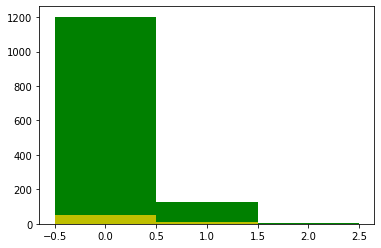

Bowler's Hitrate  :  0.10194902548725637
Bowlership's Hitrate  :  0.16666666666666666


Bowler's Skew     :  2.922462700026251
Bowlership's Skew :  0.6543008243388911
Bowler's Kurtosis     :  7.65778713499968
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


SCJ Broad GP Swann


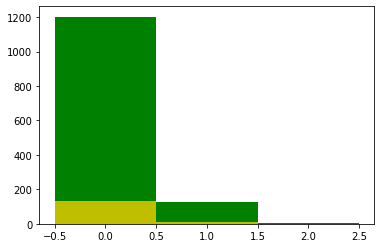

Bowler's Hitrate  :  0.10194902548725637
Bowlership's Hitrate  :  0.06474820143884892


Bowler's Skew     :  2.922462700026251
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.65778713499968
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


SJ Benn CH Gayle


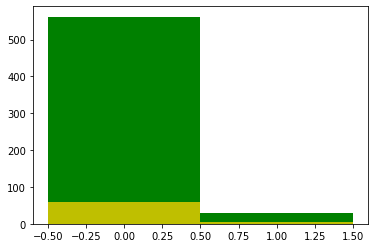

Bowler's Hitrate  :  0.05067567567567568
Bowlership's Hitrate  :  0.07692307692307693


Bowler's Skew     :  4.097159273966718
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.786714116251481
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


SJ Benn JE Taylor


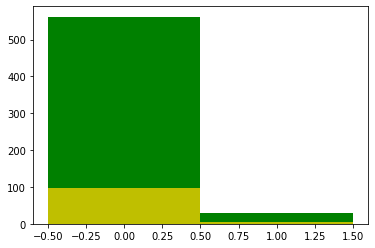

Bowler's Hitrate  :  0.05067567567567568
Bowlership's Hitrate  :  0.049019607843137254


Bowler's Skew     :  4.097159273966718
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.786714116251481
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


SJ Benn S Shillingford


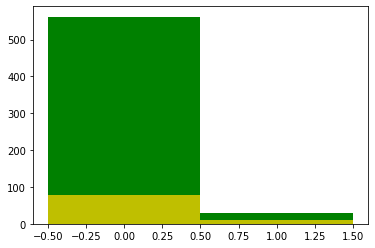

Bowler's Hitrate  :  0.05067567567567568
Bowlership's Hitrate  :  0.10227272727272728


Bowler's Skew     :  4.097159273966718
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.786714116251481
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


SJ Benn KAJ Roach


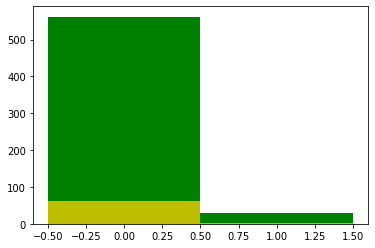

Bowler's Hitrate  :  0.05067567567567568
Bowlership's Hitrate  :  0.03076923076923077


Bowler's Skew     :  4.097159273966718
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  14.786714116251481
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


ST Finn JM Anderson


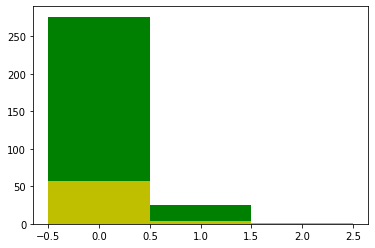

Bowler's Hitrate  :  0.08940397350993377
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.252130677819899
Bowlership's Skew :  0.6998988315081754
Bowler's Kurtosis     :  10.04509602373796
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


ST Gabriel JO Holder


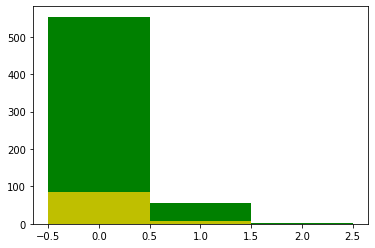

Bowler's Hitrate  :  0.09967320261437909
Bowlership's Hitrate  :  0.0851063829787234


Bowler's Skew     :  3.1309226366056397
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.419920055673305
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


ST Gabriel RL Chase


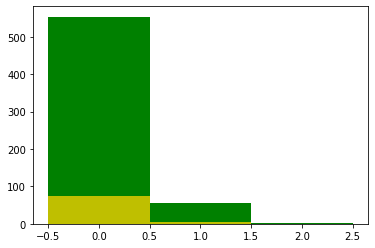

Bowler's Hitrate  :  0.09967320261437909
Bowlership's Hitrate  :  0.075


Bowler's Skew     :  3.1309226366056397
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.419920055673305
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


ST Gabriel KAJ Roach


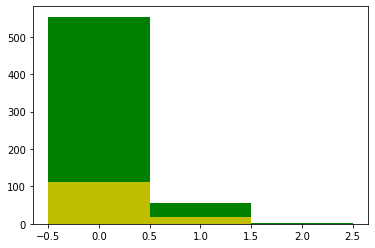

Bowler's Hitrate  :  0.09967320261437909
Bowlership's Hitrate  :  0.13953488372093023


Bowler's Skew     :  3.1309226366056397
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.419920055673305
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Saeed Ajmal Umar Gul


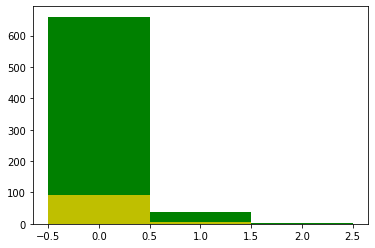

Bowler's Hitrate  :  0.06134094151212553
Bowlership's Hitrate  :  0.061855670103092786


Bowler's Skew     :  4.182319542280007
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  17.85040170445966
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Saeed Ajmal Junaid Khan


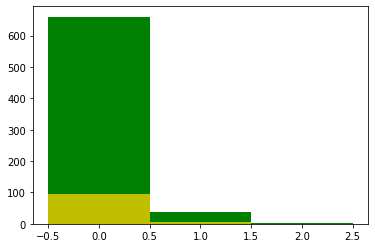

Bowler's Hitrate  :  0.06134094151212553
Bowlership's Hitrate  :  0.058823529411764705


Bowler's Skew     :  4.182319542280007
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  17.85040170445966
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Saeed Ajmal Abdur Rehman


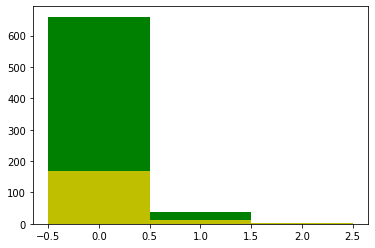

Bowler's Hitrate  :  0.06134094151212553
Bowlership's Hitrate  :  0.08839779005524862


Bowler's Skew     :  4.182319542280007
Bowlership's Skew :  0.6978231250092277
Bowler's Kurtosis     :  17.85040170445966
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


Shakib Al Hasan Rubel Hossain


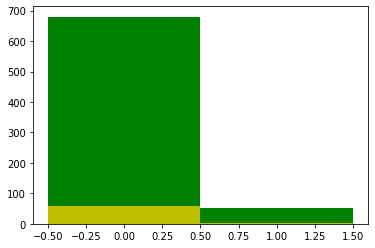

Bowler's Hitrate  :  0.07103825136612021
Bowlership's Hitrate  :  0.04918032786885246


Bowler's Skew     :  3.3396696940204094
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.153393665158372
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Shakib Al Hasan Mahmudullah


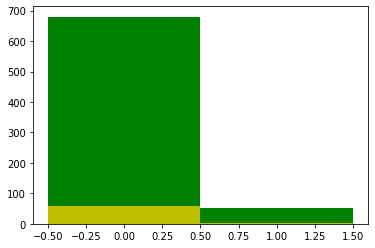

Bowler's Hitrate  :  0.07103825136612021
Bowlership's Hitrate  :  0.047619047619047616


Bowler's Skew     :  3.3396696940204094
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.153393665158372
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Shakib Al Hasan Shahadat Hossain


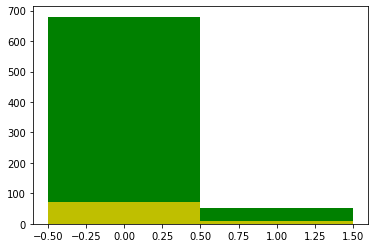

Bowler's Hitrate  :  0.07103825136612021
Bowlership's Hitrate  :  0.12048192771084337


Bowler's Skew     :  3.3396696940204094
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.153393665158372
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


TA Boult TG Southee


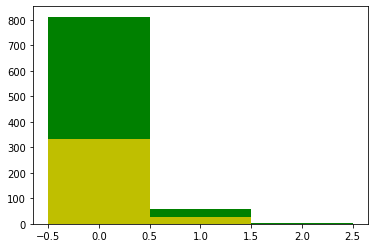

Bowler's Hitrate  :  0.07428571428571429
Bowlership's Hitrate  :  0.08055555555555556


Bowler's Skew     :  3.7310670236337256
Bowlership's Skew :  0.6912660743072013
Bowler's Kurtosis     :  13.907469551755298
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


TA Boult C de Grandhomme


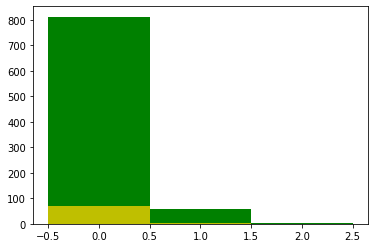

Bowler's Hitrate  :  0.07428571428571429
Bowlership's Hitrate  :  0.056338028169014086


Bowler's Skew     :  3.7310670236337256
Bowlership's Skew :  0.7065672567084738
Bowler's Kurtosis     :  13.907469551755298
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


TA Boult N Wagner


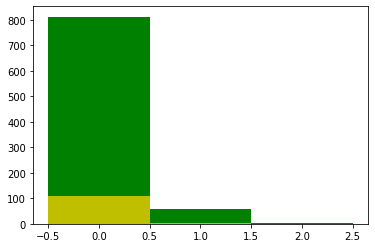

Bowler's Hitrate  :  0.07428571428571429
Bowlership's Hitrate  :  0.035398230088495575


Bowler's Skew     :  3.7310670236337256
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  13.907469551755298
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


TG Southee TA Boult


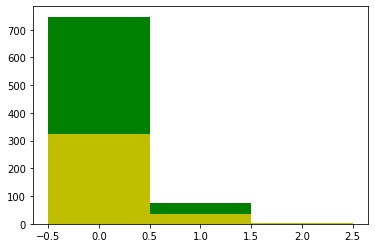

Bowler's Hitrate  :  0.0993939393939394
Bowlership's Hitrate  :  0.10833333333333334


Bowler's Skew     :  3.1334713946024713
Bowlership's Skew :  0.6794235348445957
Bowler's Kurtosis     :  9.431593618577015
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


TG Southee N Wagner


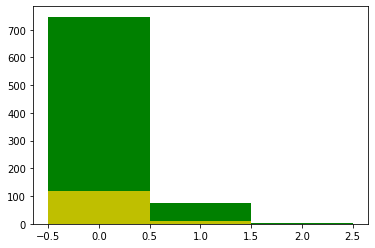

Bowler's Hitrate  :  0.0993939393939394
Bowlership's Hitrate  :  0.0859375


Bowler's Skew     :  3.1334713946024713
Bowlership's Skew :  0.6952087922584429
Bowler's Kurtosis     :  9.431593618577015
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Taijul Islam Mehedi Hasan Miraz


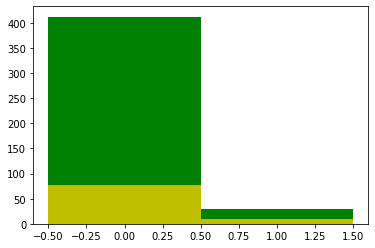

Bowler's Hitrate  :  0.06787330316742081
Bowlership's Hitrate  :  0.11363636363636363


Bowler's Skew     :  3.4360076931395125
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.806148867313912
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


UT Yadav R Ashwin


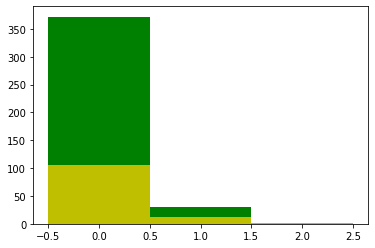

Bowler's Hitrate  :  0.08415841584158416
Bowlership's Hitrate  :  0.11864406779661017


Bowler's Skew     :  3.5595383278887454
Bowlership's Skew :  0.6777340314138557
Bowler's Kurtosis     :  12.728099565865346
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


UT Yadav I Sharma


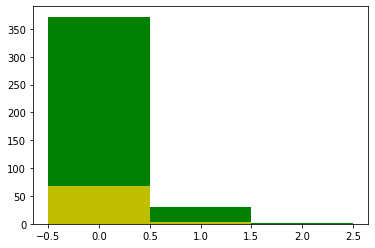

Bowler's Hitrate  :  0.08415841584158416
Bowlership's Hitrate  :  0.05555555555555555


Bowler's Skew     :  3.5595383278887454
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.728099565865346
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Umar Gul Danish Kaneria


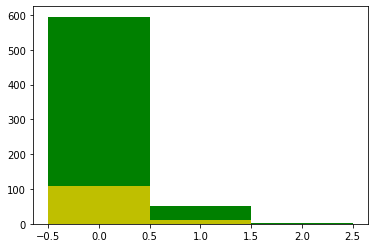

Bowler's Hitrate  :  0.0804953560371517
Bowlership's Hitrate  :  0.09090909090909091


Bowler's Skew     :  3.298913311535128
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.845518894070455
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Umar Gul Mohammad Asif


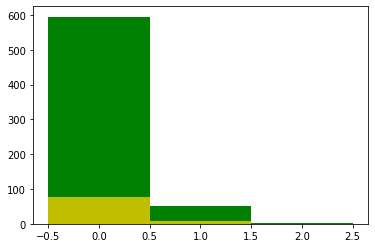

Bowler's Hitrate  :  0.0804953560371517
Bowlership's Hitrate  :  0.09302325581395349


Bowler's Skew     :  3.298913311535128
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.845518894070455
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Umar Gul Saeed Ajmal


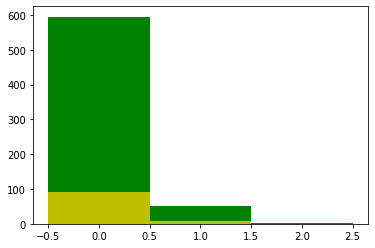

Bowler's Hitrate  :  0.0804953560371517
Bowlership's Hitrate  :  0.07216494845360824


Bowler's Skew     :  3.298913311535128
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.845518894070455
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Umar Gul Abdur Rehman


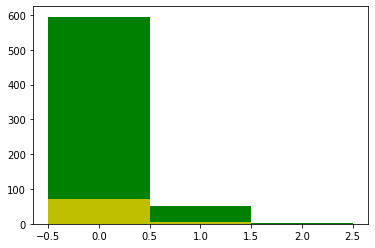

Bowler's Hitrate  :  0.0804953560371517
Bowlership's Hitrate  :  0.05263157894736842


Bowler's Skew     :  3.298913311535128
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.845518894070455
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


VD Philander DW Steyn


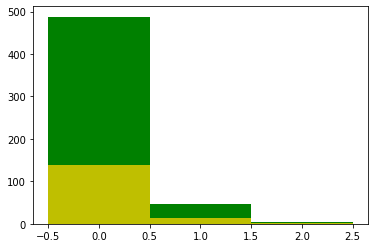

Bowler's Hitrate  :  0.1038961038961039
Bowlership's Hitrate  :  0.11688311688311688


Bowler's Skew     :  3.3137169576812036
Bowlership's Skew :  0.6869548938316496
Bowler's Kurtosis     :  11.040456914412978
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


VD Philander M Morkel


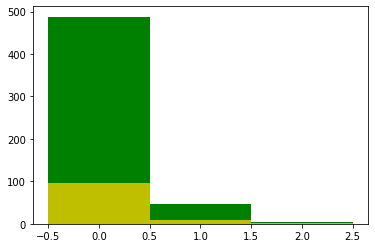

Bowler's Hitrate  :  0.1038961038961039
Bowlership's Hitrate  :  0.09615384615384616


Bowler's Skew     :  3.3137169576812036
Bowlership's Skew :  0.6929193609610957
Bowler's Kurtosis     :  11.040456914412978
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


VD Philander K Rabada


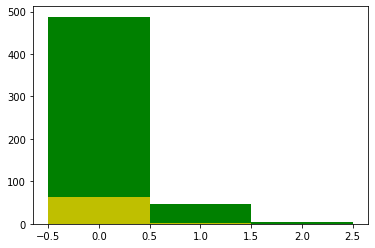

Bowler's Hitrate  :  0.1038961038961039
Bowlership's Hitrate  :  0.046153846153846156


Bowler's Skew     :  3.3137169576812036
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.040456914412978
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


VD Philander KA Maharaj


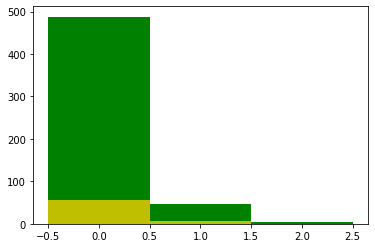

Bowler's Hitrate  :  0.1038961038961039
Bowlership's Hitrate  :  0.0967741935483871


Bowler's Skew     :  3.3137169576812036
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.040456914412978
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Wahab Riaz Yasir Shah


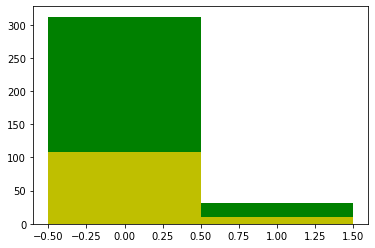

Bowler's Hitrate  :  0.09302325581395349
Bowlership's Hitrate  :  0.0847457627118644


Bowler's Skew     :  2.8022426915890257
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.852564102564104
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Yasir Shah Wahab Riaz


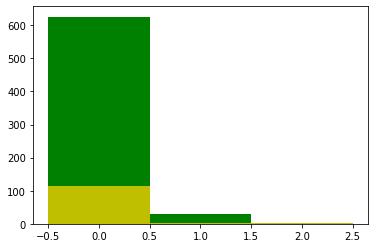

Bowler's Hitrate  :  0.05167173252279635
Bowlership's Hitrate  :  0.03389830508474576


Bowler's Skew     :  4.736763231652385
Bowlership's Skew :  0.7069215426941708
Bowler's Kurtosis     :  23.59271061574023
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.50, p=0.25 
Two-Sided : Statistics=6.50, p=0.51 
Less : Statistics=6.50, p=0.87 

____________________________________________


Yasir Shah Mohammad Amir


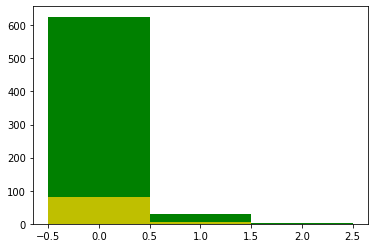

Bowler's Hitrate  :  0.05167173252279635
Bowlership's Hitrate  :  0.058823529411764705


Bowler's Skew     :  4.736763231652385
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  23.59271061574023
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Yasir Shah Mohammad Abbas


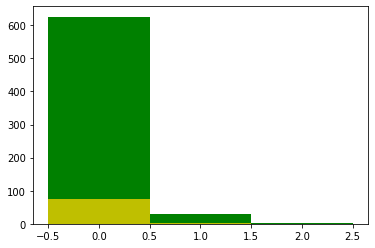

Bowler's Hitrate  :  0.05167173252279635
Bowlership's Hitrate  :  0.038461538461538464


Bowler's Skew     :  4.736763231652385
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  23.59271061574023
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Z Khan I Sharma


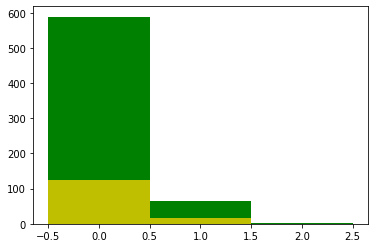

Bowler's Hitrate  :  0.10091743119266056
Bowlership's Hitrate  :  0.11347517730496454


Bowler's Skew     :  2.8084105613097408
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.540504448555961
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Z Khan Harbhajan Singh


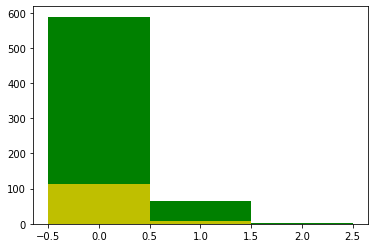

Bowler's Hitrate  :  0.10091743119266056
Bowlership's Hitrate  :  0.06611570247933884


Bowler's Skew     :  2.8084105613097408
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.540504448555961
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Z Khan A Kumble


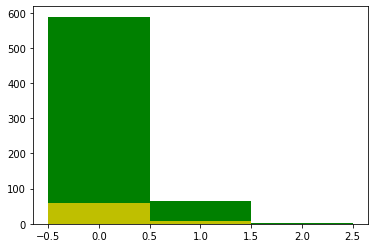

Bowler's Hitrate  :  0.10091743119266056
Bowlership's Hitrate  :  0.11764705882352941


Bowler's Skew     :  2.8084105613097408
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.540504448555961
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________




In [10]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        print(name,pname)
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['wicket1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['wicket2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())
        
        pure_dict = dict(dfbowler['wicket'].value_counts())
        plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
        plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)
        
        plt.show()
        
        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        bh = s/d
        print("Bowler's Hitrate  : ",bh)
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bsh = s/d 
        print("Bowlership's Hitrate  : ",bsh)
        print('\n')
        
        print("Bowler's Skew     : ",skew(dfbowler['wicket'].dropna()))
        print("Bowlership's Skew : ",skew((fin_df[1].dropna())))
        
        print("Bowler's Kurtosis     : ",kurtosis(dfbowler['wicket'].dropna()))
        print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))
        
        print('\n')
        
        alpha = 0.05

        batch_1 = dfbowler['wicket'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

        #if p_value1 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

        #if p_value2 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

        #if p_value3 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

        if (p_value1 < alpha) and (p_value2 < alpha):
            print(name,"-",pname,"better than",name)
        if (p_value3 < alpha) and (p_value2 < alpha):
            print(name,"-",pname, "worse than",name)
        
        print('____________________________________________\n\n')
#print(fin_dict)
#print(fin_df)